# Computer Vision Project
In this project, YOLOv5 will be used as the base model and then it will be applied techniques such as knowledge distillation, pruning, and quantization. The goal is to develop the lightest model possible while maintaining optimal inference performance.

## 1. Setup


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install onnx onnxruntime onnxruntime-tools psutil
!pip install torch torchvision thop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.4 MB/s eta 0:00:00


In [4]:
%mkdir yolov5_ws
%cd yolov5_ws
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

/content/yolov5_ws
Cloning into 'yolov5'...
remote: Enumerating objects: 16941, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 16941 (delta 70), reused 95 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16941/16941), 15.69 MiB | 11.84 MiB/s, done.
Resolving deltas: 100% (11608/11608), done.
/content/yolov5_ws/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


## 2. Base yolov5 model


- Visualize predictions on the base model for comparison.

In [ ]:
!python /content/yolov5_ws/yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/testing/000455.png

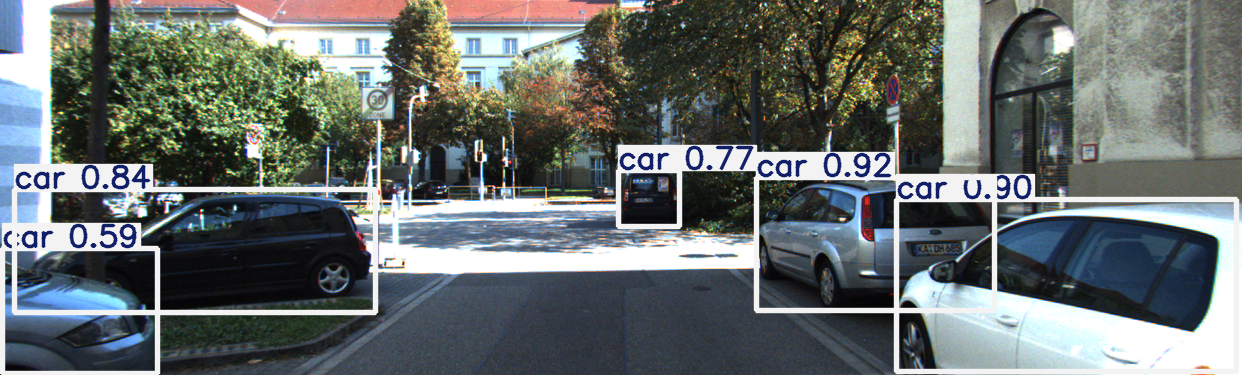

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5_ws/yolov5/runs/detect/exp/000455.png"
display(Image.open(image_path))

## 3. Train model

Train model on custom datase

In [1]:
!ls /content/drive/MyDrive/training/dataset/train/images | wc -l

766


In [2]:
!ls /content/drive/MyDrive/training/dataset/train/labels | wc -l

766


In [3]:
!python /content/yolov5_ws/yolov5/train.py --img 640 --batch 32 --epochs 4 --data /content/dataset.yaml --weights yolov5s.pt

2024-09-02 18:06:40.852183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 18:06:40.885383: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 18:06:40.895265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/dataset.yaml, hyp=yolov5_ws/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=4, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5_ws/yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device

Visualize detection of trained model

In [4]:
!python /content/yolov5_ws/yolov5/detect.py --weights /content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source /content/drive/MyDrive/testing/000100.png

detect: weights=['/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/testing/000100.png, data=yolov5_ws/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5_ws/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testing/000100.png: 224x640 10 Cars, 29.5ms
Speed: 0.5ms pre-process, 29.5ms inference, 578.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov

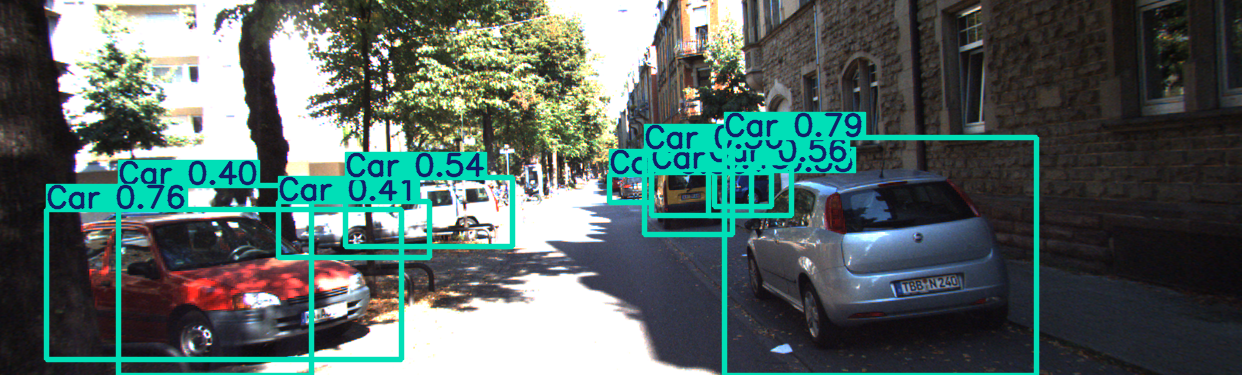

In [6]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5_ws/yolov5/runs/detect/exp/000100.png"
display(Image.open(image_path))

Export trained model

In [8]:
!python /content/yolov5_ws/yolov5/export.py  --weights /content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt  --include onnx

export: data=yolov5_ws/yolov5/data/coco128.yaml, weights=['/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt with output shape (1, 25200, 9) (13.6 MB)

ONNX: starting export with onnx 1.16.2...
ONNX: export success ✅ 1.1s, saved as /content/yolov5_ws/yolov5/runs/train/exp/weights/best.onnx (27.2 MB)

Export complete (1.9s)
Results saved to /content/yolov5_ws/yolov5/runs/train/exp/weights
Detect:          python detect.py

Evaluate trained model

In [9]:
!python /content/yolov5_ws/yolov5/val.py --weights /content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt --data /content/dataset.yaml --img 640 --half

val: data=/content/dataset.yaml, weights=['/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_ws/yolov5/runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/training/dataset/val/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:08<00:00,  1.24s/it]
                   all        200       1200      0.769       0.28      0.281      0.108
                   Van        200         93          1      

In [13]:
!python /content/yolov5_ws/yolov5/val.py --weights /content/yolov5_ws/yolov5/runs/train/exp/weights/best.onnx --data /content/dataset.yaml --img 640

val: data=/content/dataset.yaml, weights=['/content/yolov5_ws/yolov5/runs/train/exp/weights/best.onnx'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_ws/yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/yolov5_ws/yolov5/runs/train/exp/weights/best.onnx for ONNX Runtime inference...
Forcing --batch-size 1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/drive/MyDrive/training/dataset/val/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 200/200 [00:11<00:00, 17.94it/s]
                   all        200       1200      0.769    

## 4. Efficient inference

- **knoledge destilation**
- **pruning**
- **quantization**

Wich one or wich combination is the best in reducing the model while mantaining the accuracy

### - Quantization

In [5]:
import torch
from torch.quantization import quantize_dynamic

# Load the model
model_path = '/content/drive/MyDrive/ColabFiles/model_pruned.pt'
model = torch.hub.load('/content/yolov5_ws/yolov5/', 'custom', path=model_path, source='local')
ckpt = torch.load(model_path)
model = ckpt['model']

# Apply dynamic quantization
quantized_model = quantize_dynamic(model, {torch.nn.Linear}, dtype=torch.qint8)

# Save the quantized model
torch.save(quantized_model.state_dict(), '/content/quantized_model.pt')

print("Quantization complete. Model saved as 'quantized_model.pt'.")

KeyboardInterrupt: 

preprocess model for better quantization

In [31]:
!python -m onnxruntime.quantization.preprocess --input model_pruned.onnx --output model_pruned-infer.onnx

quantized model

In [30]:
import onnx
from onnxruntime.quantization import quantize_dynamic, QuantType

def quantized(input_model, output_model):
    # Load the ONNX model
    onnx_model_path = input_model
    model = onnx.load(onnx_model_path)

    # Specify the path to save the quantized model
    quantized_model_path = output_model

    # Quantize the model dynamically using Min-Max quantization
    try:
        quantize_dynamic(
            model_input=onnx_model_path,
            model_output=quantized_model_path,
            weight_type=QuantType.QUInt8
        )
        print(f"Quantized model saved to {quantized_model_path}")
    except ValueError as e:
        print(f"Quantization failed: {e}")


input_model = '/content/yolov5_ws/yolov5/runs/train/exp/weights/best.onnx'
output_model = '/content/quantized_model.onnx'
quantized(input_model, output_model)

Quantized model saved to /content/quantized_model.onnx


Visualize detection on quantized model

In [3]:
!python /content/yolov5_ws/yolov5/detect.py --weights /content/quantized_model.onnx --img 640 --conf 0.5 --source /content/drive/MyDrive/testing/image_02/0000/000060.png

detect: weights=['/content/quantized_model.onnx'], source=/content/drive/MyDrive/testing/image_02/0000/000060.png, data=yolov5_ws/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5_ws/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CPU

Loading /content/quantized_model.onnx for ONNX Runtime inference...
Traceback (most recent call last):
  File "/content/yolov5_ws/yolov5/detect.py", line 437, in <module>
    main(opt)
  File "/content/yolov5_ws/yolov5/detect.py", line 432, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in 

In [4]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5_ws/yolov5/runs/detect/exp11/000060.png"
display(Image.open(image_path))

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5_ws/yolov5/runs/detect/exp11/000060.png'

Evaluate quantized model

In [ ]:
!python /content/yolov5_ws/yolov5/val.py --weights /content/quantized_model.onnx --data /content/dataset.yaml

## 4.1 Combine two of the tranformations

### - Knoledged destilation && Pruning

In [39]:
## input is previous destilled model
input = '/content/yolov5-knowledge-distillation/runs/train/exp/weights/best.pt'
output_model = '/content/destilation_prunning.pt'
prunning(input_model, output_model)

Model summary: 214 layers, 7030417 parameters, 0 gradients
Model pruned to 0.299 global sparsity
Model summary: 214 layers, 7030417 parameters, 0 gradients


### - Knoledged destilation && Quantization

In [35]:
## inout is orevious destilled model
input_model = '/content/yolov5_ws/yolov5/runs/train/exp/weights/best.onnx'
output_model = '/content/quantized_model.onnx'
quantized(input_model, output_model)

Quantized model saved to /content/quantized_model.onnx


### - Pruning && Quantization

In [41]:
input_model = '/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt'
output_pruned = '/content/pruned_model.pt'
prunning(input_model, output_pruned)

Model summary: 214 layers, 7030417 parameters, 0 gradients
Model pruned to 0.299 global sparsity
Model summary: 214 layers, 7030417 parameters, 0 gradients


In [42]:
!python /content/yolov5_ws/yolov5/export.py  --weights /content/pruned_model.pt  --include onnx

export: data=yolov5_ws/yolov5/data/coco128.yaml, weights=['/content/pruned_model.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/pruned_model.pt with output shape (1, 25200, 9) (13.7 MB)

ONNX: starting export with onnx 1.16.2...
ONNX: export success ✅ 1.1s, saved as /content/pruned_model.onnx (27.2 MB)

Export complete (2.2s)
Results saved to /content
Detect:          python detect.py --weights /content/pruned_model.onnx 
Validate:        python val.py --weights /content/pruned_model.onnx 
PyTorch Hub:     model = tor

In [45]:
output_pruned = '/content/pruned_model.onnx'
output_model = '/content/quantization_pruning.onnx'
quantized(output_pruned, output_model)

Quantized model saved to /content/quantization_pruning.onnx


## 4.2. Combine the three transformations

In [46]:
input = '/content/yolov5-knowledge-distillation/runs/train/exp/weights/best.pt'
output_model = '/content/destilation_prunning.pt'
prunning(input_model, output_model)

Model summary: 214 layers, 7030417 parameters, 0 gradients
Model pruned to 0.299 global sparsity
Model summary: 214 layers, 7030417 parameters, 0 gradients


In [47]:
!python /content/yolov5_ws/yolov5/export.py  --weights /content/destilation_prunning.pt  --include onnx

export: data=yolov5_ws/yolov5/data/coco128.yaml, weights=['/content/destilation_prunning.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/destilation_prunning.pt with output shape (1, 25200, 9) (13.7 MB)

ONNX: starting export with onnx 1.16.2...
ONNX: export success ✅ 0.8s, saved as /content/destilation_prunning.onnx (27.2 MB)

Export complete (1.6s)
Results saved to /content
Detect:          python detect.py --weights /content/destilation_prunning.onnx 
Validate:        python val.py --weights /content/destilation_pru

In [48]:
output_pruned = '/content/destilation_prunning.onnx'
output_model = '/content/reduced_model.onnx'
quantized(output_pruned, output_model)

Quantized model saved to /content/reduced_model.onnx


## 5. Model Results

In [10]:
from pathlib import Path
from ultralytics import YOLO
import cv2
import time

def video_test(model, input_video, output_video):
    # Load your trained YOLOv8 model
    model_path = model
    model = YOLO(model_path)

    # Path to the input video
    input_video_path = input_video

    # Path to save the output video with inferences
    output_video_path = output_video

    # Open the input video file
    video_capture = cv2.VideoCapture(input_video_path)

    # Get the video's frame width, height, and frames per second (FPS)
    frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_capture.get(cv2.CAP_PROP_FPS))

    # Create a video writer object to save the output video
    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    # Start time for inference
    start_time = time.time()

    # Process each frame of the video
    frame_count = 0
    while True:
        ret, frame = video_capture.read()
        if not ret:
            break

        # Perform inference on the frame
        results = model(frame)

        # Draw bounding boxes on the frame
        annotated_frame = frame.copy()
        for box in results[0].boxes.xyxy.cpu().numpy():
            xmin, ymin, xmax, ymax = box[:4].astype(int)
            cv2.rectangle(annotated_frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

        # Write the annotated frame to the output video
        video_writer.write(annotated_frame)

        frame_count += 1

    # Release the video capture and video writer objects
    video_capture.release()
    video_writer.release()

    # End time for inference
    end_time = time.time()

    # Calculate the time taken for inference
    inference_time = end_time - start_time

    # Calculate frames per second (FPS)
    video_fps = frame_count / inference_time

    # Print results
    print("Frames per second (FPS):", video_fps)
    print("Time taken for inference:", inference_time, "seconds")


model = "/content/pruned_model.onnx"
input_video = "/content/drive/MyDrive/test.mp4"
output_video = "/content/drive/MyDrive/video_with_inferences.mp4"

### Evaluating ONNX Models on Various Metrics
In this section, we will evaluate several key metrics for three ONNX models. The metrics we will analyze are:

1. **Multiply and Accumulate operations (MACs)**: This metric provides insight into the computational complexity of the model by counting the number of multiply-accumulate operations.
2. **Memory Usage**: We will measure the memory usage during inference to understand the model's memory footprint.
3. **Floating Point Operations (FLOPs)**: Similar to MACs, this metric counts the number of floating-point operations, giving another perspective on the computational load.
4. **Inference Time**: The time taken to perform inference on a specific hardware, which is critical for understanding the real-time performance of the model.
5. **Carbon Footprint**: An estimation of the carbon emissions associated with the energy consumption during model inference.
Efficient Error Rate (EER): A domain-specific metric that needs to be computed based on the model's predictions and the actual values.

In [7]:
!pip install onnx onnxruntime onnxruntime-tools onnx-tool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.8 MB/s eta 0:00:00


In [32]:
!python -m onnx_tool -m profile -i /content/quantized_model.onnx -f out.txt

/usr/local/lib/python3.10/dist-packages/onnx_tool/node.py:2511: UserWarning: node DynamicQuantizeLinear is not registed for profiling, return 0 Macs and 0 params as default. Use NODEPROFILER_REGISTRY to register your profiler for this node.
  warnings.warn(f'node {n.op_type} is not registed for profiling, return 0 Macs and 0 params as default. '
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/onnx_tool/__main__.py", line 93, in <module>
    onnx_tool.model_profile(args.in_, dynamic, save_profile=args.file, save_model=args.out)
  File "/usr/local/lib/python3.10/dist-packages/onnx_tool/__init__.py", line 84, in model_profile
    g.shape_infer(dynamic_shapes)
  File "/usr/local/lib/python3.10/dist-packages/onnx_tool/graph.py", line 992, in shape_infe

In [8]:
import onnx
import onnxruntime as ort
import time
import psutil
import os
import subprocess
import tempfile
import numpy as np
import re

def load_model(model_path):
    return onnx.load(model_path)

def measure_inference_time(model_path, input_data):
    session = ort.InferenceSession(model_path)
    input_name = session.get_inputs()[0].name
    start_time = time.time()
    session.run(None, {input_name: input_data})
    end_time = time.time()
    return end_time - start_time

def measure_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def get_flops_macs(onnx_model_path):
    with tempfile.TemporaryDirectory() as tmpdirname:
        output_file = os.path.join(tmpdirname, "macs_results.txt")
        command = f"python -m onnx_tool -m profile -i {onnx_model_path} -f {output_file}"
        try:
            subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        except subprocess.CalledProcessError as e:
            print(f"Command failed with error: {e.stderr}")
            return 0, 0

        total_macs = 0
        total_flops = 0

        try:
            with open(output_file, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    match = re.search(r'\s+([\d,]+)\s+', line)
                    if match:
                        macs_value = match.group(1).replace(',', '')
                        total_macs += int(macs_value)
            total_flops = total_macs * 2
        except Exception as e:
            print(f"Error reading the profiling results: {e}")
            return 0, 0

    return total_flops, total_macs

def calculate_eer(model_flops, model_macs):
    reference_flops = 2000000  # Example FLOPs of the reference model
    reference_macs = 1000000   # Example MACs of the reference model

    if model_flops == 0 or model_macs == 0:
        return 0

    ratio_flops = model_flops / reference_flops if reference_flops > 0 else 0
    ratio_macs = model_macs / reference_macs if reference_macs > 0 else 0

    eer = (ratio_flops + ratio_macs) / 2
    return eer

def evaluate_model(model_path, input_data):
    model = load_model(model_path)
    flops, macs = get_flops_macs(model_path)
    inference_time = measure_inference_time(model_path, input_data)
    memory_usage = measure_memory_usage()
    eer = calculate_eer(flops, macs)

    carbon_footprint = inference_time * 0.0002

    return {
        'MACs': macs,
        'FLOPs': flops,
        'Inference Time (s)': inference_time,
        'Memory Usage (bytes)': memory_usage,
        'Carbon Footprint (kg CO2)': carbon_footprint,
        'EER': eer
    }

if __name__ == "__main__":
    model_paths = ["/content/best-infer.onnx",
                   "/content/pruned_model.onnx",
                   "/content/drive/MyDrive/ColabFiles/destilation_prunning.onnx"]

    input_shape = (1, 3, 640, 640)
    input_data = np.random.random(input_shape).astype(np.float32)

    results = {}
    for model_path in model_paths:
        results[model_path] = evaluate_model(model_path, input_data)

    for model_path, metrics in results.items():
        print(f"Metrics for {model_path}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")
        print()

Metrics for /content/best-infer.onnx:
MACs: 17427108000
FLOPs: 34854216000
Inference Time (s): 0.3423914909362793
Memory Usage (bytes): 734556160
Carbon Footprint (kg CO2): 6.847829818725586e-05
EER: 17427.108

Metrics for /content/pruned_model.onnx:
MACs: 17427108000
FLOPs: 34854216000
Inference Time (s): 0.3317580223083496
Memory Usage (bytes): 745058304
Carbon Footprint (kg CO2): 6.635160446166993e-05
EER: 17427.108

Metrics for /content/drive/MyDrive/ColabFiles/destilation_prunning.onnx:
MACs: 17427108000
FLOPs: 34854216000
Inference Time (s): 0.3270394802093506
Memory Usage (bytes): 745058304
Carbon Footprint (kg CO2): 6.540789604187012e-05
EER: 17427.108



In [70]:
# from google.colab import drive
# import shutil
# import os

# # Define source and destination directories
# source_dir = '/content/'
# destination_dir = '/content/drive/My Drive/ColabFiles/'  # Change this to your desired path

# # Create destination directory if it doesn’t exist
# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# # Copy all files from the source directory to the destination directory
# files = os.listdir(source_dir)
# for file_name in files:
#     if os.path.isfile(os.path.join(source_dir, file_name)):
#         shutil.copy(os.path.join(source_dir, file_name), os.path.join(destination_dir, file_name))

# print("All files have been copied to Google Drive.")


All files have been copied to Google Drive.
